<a href="https://colab.research.google.com/github/Choi-Laboratory/measurement_engineering_exercises/blob/master/exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題2: ラプラシアンマスク

画像の輪郭を抽出する手法の一つに**ラプラシアンマスク**というものがあります。  
着目画素の8近傍（あるいはそれ以上）の領域において、以下に示すような係数を掛けて足し合わせて、画素値を更新します。  

| | | |
| :---: | :---: | :---: |
|  -1 |  -1 | -1 |
|  -1 |  8  | -1 |
|  -1 |  -1 | -1 |

![](https://raw.githubusercontent.com/Choi-Laboratory/measurement_engineering_exercises/master/images/laplacian.jpg)

例えば、次のような画素配列において、  

|  |  |  |  
| :---: | :---: | :---: |
| 36 | 199 | 196 | 
| 129 | ↓<br>156 | 122 |
| 199 | 223 | 64 |


中心の画素(156)に8近傍のラプラシアンマスクを適用すると、  

(新しい画素値) = 36 × (-1) + 199 × (-1) + 196 × (-1)   
　　　　　　　+ 129 × (-1) + 156 × 8 + 122 × (-1)   
　　　　　　　+ 199 × (-1) + 223 × (-1) + 64 × (-1)   
　　　　　　　= **80**

画素値は80になります。

|  |  |  |  
| :---: | :---: | :---: |
| 36 | 199 | 196 | 
| 129 | **80** | 122 |
| 199 | 223 | 64 |


しかしながら、上のような配列の場合、中心以外の画素は配列の縁にあるので、8近傍の処理を施すことができません。  
そこで、入力画像に対して、処理を行う前に画像配列の周囲を0(ゼロ)で埋める方法があります。  
この手法を**ゼロパディング**と呼びます。  
以下のような配列にゼロパディングを行うと、

|  |  |  |  |
| :---: | :---: | :---: | :---: |
| A | B | C | D |
| E | F | G | H |
| I | J | K | L |
| M | N | O | P |


次のようになります。  

|  |  |  |  |  |  |
| :---: | :---: | :---: | :---: | :---: | :---: |
| **0** | **0** | **0** | **0** | **0** | **0** |
| **0** | A | B | C | D | **0** |
| **0** | E | F | G | H | **0** |
| **0** | I | J | K | L | **0** |
| **0** | M | N | O | P | **0** |
| **0** | **0** | **0** | **0** | **0** | **0** |

今回の課題では、ゼロパディングの処理を行う必要はありませんが、知識として知っておいてください。  
(余裕がある人は挑戦してみてください。)


### 課題の説明
"House_gray.png"に8近傍のラプラシアンマスクを適用し、その出力結果とプログラムのソースコードを提出してください。  
提出方法は、前回と同様で、出力画像とソースコードをWordに載せて提出してください。


ラプラシアンマスクを適用した後の画素値が0~255の範囲を超えた場合、  
0より小さいならば0、255より大きいならば255にしてください。

前述しましたが、8近傍ラプラシアンマスクは、配列の縁にあたる部分の画素に対して、マスク処理することができません。  
従って、縁の部分は画素値を0にして処理を進めてください。  
ゼロパディング処理を施せる人は、挑戦してみてください。

例として、"Lenna_gray.png"に対して、ラプラシアンマスクを施した結果を載せておきます。  


![](https://raw.githubusercontent.com/Choi-Laboratory/measurement_engineering_exercises/master/images/Lenna_LaplacianMask_result.png)


画像の輪郭部分がくっきりとしていることが、見て分かると思います。





In [1]:
""" 1/3 ※書き換える必要なし
＜配布した画像をGoogle　Colabにアップロードする処理＞
セルを実行したら、ファイル選択ができるようになります。
'House_gray.png'を選択してください。
Google Chrome以外のブラウザだと実行できない場合もあるので、注意してください。
"""

from google.colab import files #画像読み込み用の関数を使えるようにする
uploaded = files.upload() #ファイルのアップロード

Saving House_gray.png to House_gray.png


以下のような文章が出力されたら、画像のアップロードが完了です。
```
House_gray.png(image/png) - 86309 bytes, last modified: 2020/?/? - 100% done
Saving House_gray.png to House_gray.png
```

<class 'numpy.ndarray'>
(256, 256)


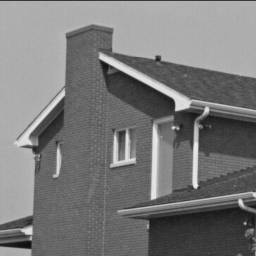

In [4]:
""" 2/3　※書き換える必要なし
＜画像を読み込む処理＞
先ほどアップロードした画像ファイルを読み込みます。
変数'gray_img'の中に、画像データが入っています（サイズは256×256）。
"""

import cv2 #画像処理の基本的な処理をまとめた関数群を使えるようにする
img_file_name = "House_gray.png" #上のセルでアップロードした画像ファイルの名前
#img_file_name = "Lenna_gray.png" #上のセルでアップロードした画像ファイルの名前
gray_img = cv2.imread(img_file_name, cv2.IMREAD_GRAYSCALE) #画像の読み込み
print(type(gray_img)) #→<class 'numpy.ndarray'>
print(gray_img.shape) #→(256, 256)

import numpy as np #配列を扱う関数を使えるようにする
output_img = np.ones((256,256), np.uint8)*255 #出力用の画像を生成

from google.colab.patches import cv2_imshow #画像を表示する関数を使えるようにする
cv2_imshow(gray_img) #画像を表示する

以下の文章と読み込んだ画像が出力されたら、画像の読み込みが無事にできています。

```
<class 'numpy.ndarray'>
(256, 256)
```

これで諸々の準備ができました。  
ここからは8近傍のラプラシアンマスクのプログラムを書いてみてください。  

関数 ``` cv2_imshow(変数名) ``` は画像配列を表示する関数です。  
この関数を使って画像を表示させてください。   

※Google Colabの仕様上、時間が立つとアップロードした画像データやメモリのデータがリセットされます。  
前のセルの実行から30分以上時間が空いてしまった場合は、1つ目のセルから順に実行し直してください。


In [ ]:
""" 3/3　※各自でプログラムを作成してください。
＜gray_imgにラプラシアンマスクを適応させる＞
gray_imgとoutput_imgは256×256の２次元配列になっています。
gray_imgの各画素にラプラシアンマスクを適用し、その結果をoutput_imgに格納してください。
"""
cv2_imshow(gray_img) #入力画像の表示




cv2_imshow(output_img) #ラプラシアンマスク適用後の画像を表示